
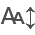

In [2]:
# Enable itables for interactive tables
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)


In [4]:
import duckdb

# Connect to an in-memory DuckDB session
con = duckdb.connect()

# Example: Preview first 50 rows of your images.parquet
df_new = con.execute("""
    SELECT *
    FROM 'data/image_index.parquet'
    where local_img_path in ('img/news18.com/1f693d2a-1f2a-4cc4-9070-1fb7fb154055/news18.com_2781_1_palestine-israel-gaza-siege-reuters-2023-10-5201bdd987452f8d69326613787e1b6d-16x9.jpg',
                 'img/bbc.com/9d368b3d-3343-4ed2-9b74-783130c61fec/bbc.com_461_4_4eb0b7b0-9765-11ef-8538-e1655f5a8342.jpg.webp',
                 'img/bbc.com/5ee8c348-12b2-4e25-8fd9-1e542288f216/bbc.com_884_1_24c394e0-4783-11ef-b74b-5f98efd74680.jpg.webp')
""").df()
# This will show a scrollable, filterable table
show(df_new)


Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [5]:
import duckdb

# Connect to an in-memory DuckDB session
con = duckdb.connect()

# Example: Preview first 50 rows of your images.parquet
df_new = con.execute("""
    SELECT *
    FROM 'data/filtered_articles.parquet'
    where id in ('1f693d2a-1f2a-4cc4-9070-1fb7fb154055', '9d368b3d-3343-4ed2-9b74-783130c61fec', '5ee8c348-12b2-4e25-8fd9-1e542288f216')
""").df()
# This will show a scrollable, filterable table
show(df_new)


Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [6]:
import duckdb

# Connect to an in-memory DuckDB session
con = duckdb.connect()

# Example: Preview first 50 rows of your images.parquet
df_clean = con.execute("""
    select *
    FROM 'data/filtered_articles.parquet'
    where id in ('1f693d2a-1f2a-4cc4-9070-1fb7fb154055', '9d368b3d-3343-4ed2-9b74-783130c61fec', '5ee8c348-12b2-4e25-8fd9-1e542288f216')
""").df()
# This will show a scrollable, filterable table
show(df_clean)

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [7]:
import duckdb

# Connect to an in-memory DuckDB session
con = duckdb.connect()

# Example: Preview first 50 rows of your images.parquet
df_clean = con.execute("""
    select image_id,caption,blip_caption
    FROM 'image_index_with_captions.parquet'
""").df()
# This will show a scrollable, filterable table
show(df_clean)

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [3]:
import duckdb

# Connect to an in-memory DuckDB session
con = duckdb.connect()

# Example: Preview first 50 rows of your images.parquet
df_clean = con.execute("""
    select image_id,caption,blip_caption
    FROM 'data/blip_captioned_images.parquet'
""").df()
# This will show a scrollable, filterable table
show(df_clean)

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [16]:
import duckdb

# Connect to an in-memory DuckDB session
con = duckdb.connect()

# Example: Preview first 50 rows of your images.parquet
df_clean = con.execute("""
    select source_domain,id,url, date_published, publish_date_cleaned, date_readable
    FROM 'data/filtered_articles_cleaned.parquet'
    where source_domain in ('indianexpress.com') and date_readable = false
""").df()
# This will show a scrollable, filterable table
show(df_clean)

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)



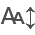

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [5]:
import duckdb
# Enable itables for interactive tables
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

# Connect to an in-memory DuckDB session
con = duckdb.connect()

# Example: Preview first 50 rows of your images.parquet
df_clean = con.execute("""
    select article_id, count(*) as total_images
    from 'data/blip_captioned_images_labeled.parquet'
    where source_domain in ('cnn.com')
    group by article_id
    having sum(case when outside_article = false then 1 else 0 end) = 0
    order by total_images desc
""").df()
# This will show a scrollable, filterable table
show(df_clean)